In [11]:
%matplotlib inline
import radical.analytics as ra
import radical.pilot as rp
import radical.utils as ru
import radical.entk as re
import more_itertools as mit
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import json
from scipy.optimize import curve_fit
from scipy import stats
from pprint import pprint
from sklearn.metrics import r2_score
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
!radical-stack


  python               : 2.7.16
  pythonpath           : 
  virtualenv           : radical.analytics

  radical.analytics    : v0.50.0-10-g76b5950@devel
  radical.entk         : 0.7.8
  radical.pilot        : 0.50.16
  radical.utils        : 0.50.2
  saga                 : 0.50.0



In [14]:
stage_0_units = pd.read_csv('../Data/Des3Images6/pilot.0000/stage_0_units.csv')
train_stage_0_units = stage_0_units
train_stage_0_units.reset_index(drop='index',inplace=True)

test_stage_0_units = pd.read_csv('../Data/Des3Images7/pilot.0000/stage_0_units.csv')

stage_0_units = train_stage_0_units.append(test_stage_0_units)
stage_0_units.reset_index(drop='index',inplace=True)
stage_0_units['tilesize'] = stage_0_units['ImageSize'] / stage_0_units['Tiles']

In [15]:
stage_1_units = pd.read_csv('../Data/Des3Images6/pilot.0000/stage_1_units.csv')
train_stage_1_units = stage_1_units
train_stage_1_units.reset_index(drop='index',inplace=True)

test_stage_1_units = pd.read_csv('../Data/Des3Images7/pilot.0000/stage_1_units.csv')

stage_1_units = train_stage_1_units.append(test_stage_1_units)
stage_1_units.reset_index(drop='index',inplace=True)

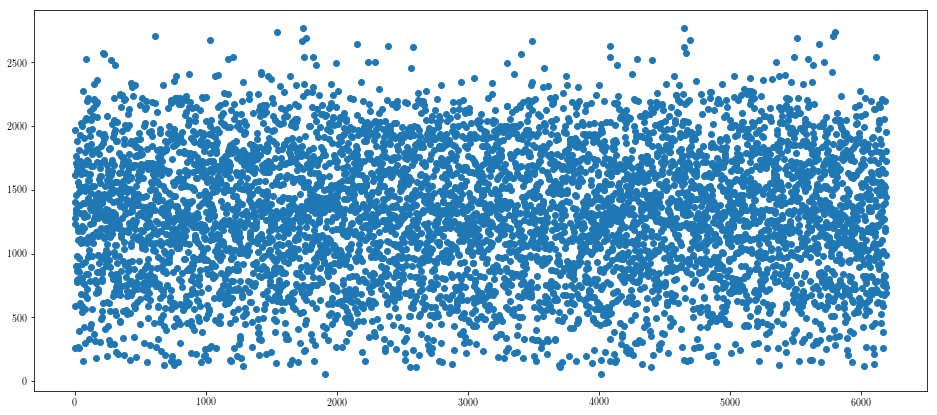

In [16]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(16,7),sharey='row')
_ = axis.scatter(range(len(stage_0_units)),stage_0_units['ImageSize'].values)


In [17]:
stage_0_units.sort_values(by='ImageSize',inplace=True)
stage_0_units.reset_index(drop='index',inplace=True)
stage_1_units.sort_values(by='ImageSize',inplace=True)
stage_1_units.reset_index(drop='index',inplace=True)

stage_0_tasks3 = stage_0_units.reset_index(drop='index')
stage_1_tasks3 = stage_1_units.reset_index(drop='index')

train_stage_0_ranges = pd.DataFrame(columns=['Bin','SizeArray','SizeMean','SizeStd','SizeMin','SizeMax','TimeArray','TimeMean','TimeStd','TimeMin','TimeMax'])
train_stage_1_ranges = pd.DataFrame(columns=['Bin','SizeArray','SizeMean','SizeStd','SizeMin','SizeMax','TimeArray','TimeMean','TimeStd','TimeMin','TimeMax'])
for i in range(50,2800,125):
    train_stage_0_ranges.loc[len(train_stage_0_ranges)] = [[i, i + 125],stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values,
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values.mean(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values.std(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values.min(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values.max(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['TTX'].values,
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['TTX'].values.mean(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['TTX'].values.std(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['TTX'].values.min(),
                                                                        stage_0_tasks3[(i < stage_0_tasks3['ImageSize']) & (stage_0_tasks3['ImageSize'] < (i + 125))]['TTX'].values.max()]
    train_stage_1_ranges.loc[len(train_stage_1_ranges)] = [[i, i + 125],stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values,
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values.mean(),
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values.std(),
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values.min(),
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['ImageSize'].values.max(),
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['TTX'].values,
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['TTX'].values.mean(),
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['TTX'].values.std(),
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['TTX'].values.min(),
                                                                        stage_1_tasks3[(i < stage_1_tasks3['ImageSize']) & (stage_1_tasks3['ImageSize'] < (i + 125))]['TTX'].values.max()]

In [24]:
def func(x, a, b,c):
    return a*np.log10(x+b)+c

xdata = stage_0_units['ImageSize'].values
ydata = stage_0_units['TTX'].values
poptTillingDes1, pcovTillingDes1 = curve_fit(func,xdata,ydata)


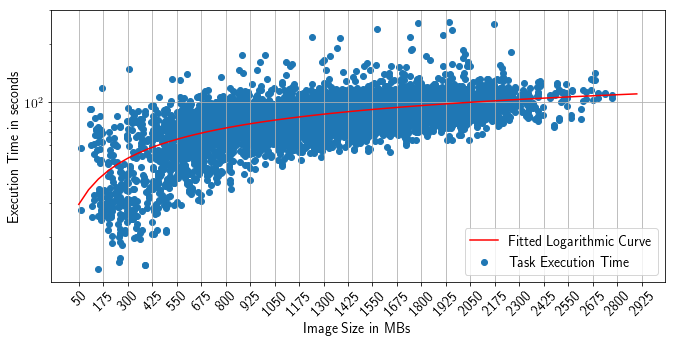

In [25]:
x = np.array(range(50,2950,50))
y1 = func(x, *poptTillingDes1)

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(11,5),sharey='row')
_ = axis.scatter(stage_0_units['ImageSize'].values,stage_0_units['TTX'].values,label="Task Execution Time")
_ = axis.plot(x, y1, 'r-', label="Fitted Logarithmic Curve")
_ = axis.set_ylabel('Execution Time in seconds',fontsize=14)
_ = axis.set_xlabel('Image Size in MBs',fontsize=14)
_ = axis.set_xticks(np.array(range(50,3050,125)))
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=14,rotation=45)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=14)
_ = axis.grid('on')
_ = axis.set_yscale('log')
_ = axis.legend(fontsize=14)
# _ = axis[0].set_title('Stage 1 Task Execution time based on Image Size Design 1',fontsize=20)
# fig.savefig('stage_0_tx_scatter.pdf',dpi=800,bbox_inches='tight')
#print 'Logarithmic: R-squared', r2_score(stage_0_ranges['TimeMean'].values,y), 'Standard Error of the Estimation: ', s1

In [11]:
train_stage_0_ranges['SizeMean'].values[4:20]

array([ 616.18987342,  739.86931818,  861.78918919,  988.50943396,
       1112.75708502, 1236.35932203, 1359.125     , 1486.85714286,
       1615.18695652, 1733.40740741, 1861.85561497, 1986.64242424,
       2116.45833333, 2217.96969697, 2355.61538462, 2508.83333333])

In [26]:
def func_lin(x, a, b):
    return a * x + b

xdata = train_stage_0_ranges['SizeMean'].values[4:19]
ydata = train_stage_0_ranges['TimeMean'].values[4:19]
poptTillingDes1lin, pcovTillingDes1lin = curve_fit(func_lin,xdata,ydata)
y = func_lin(xdata, *poptTillingDes1lin)
s_test = np.sqrt(np.sum(np.power((train_stage_0_ranges['TimeMean'].values[4:19] - y), 2))/(len(y)-2))
print 'Linear: R-squared', r2_score(train_stage_0_ranges['TimeMean'].values[4:19],y), '$S_{error}$', s_test
print 'Parameter Values', poptTillingDes1lin

Linear: R-squared 0.9706748914583943 $S_{error}$ 1.9257976881740269
Parameter Values [1.92036472e-02 6.04868300e+01]


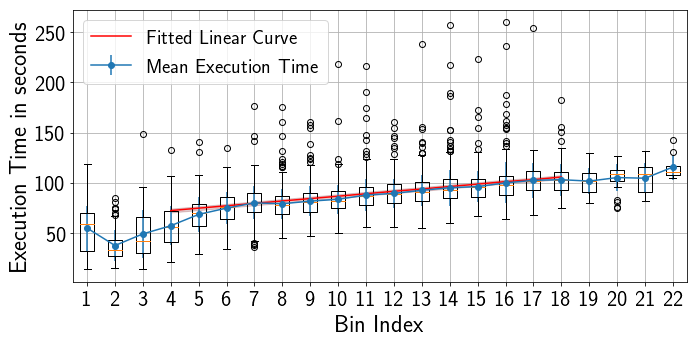

In [29]:
x = train_stage_0_ranges['SizeMean'].values

fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(11,5),sharey='row')
_ = axis.boxplot(train_stage_0_ranges['TimeArray'].values)
_ = axis.errorbar(range(1,23),train_stage_0_ranges['TimeMean'].values,yerr=train_stage_0_ranges['TimeStd'].values,marker='o',label='Mean Execution Time')
_ = axis.plot(range(4,19), y, 'r-', label="Fitted Linear Curve")
_ = axis.fill_between(range(4,19),y - s_test, y + s_test, color=reds(250), alpha=0.2)
_ = axis.set_ylabel('Execution Time in seconds',fontsize=24)
_ = axis.set_xlabel('Bin Index',fontsize=24)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=22)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=22)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
fig.savefig('stage_0_tx_box.pdf',dpi=800,bbox_inches='tight')

In [30]:
def func_log(x, a, b,c):
    return a*np.log10(x+b)+c

def func_lin(x, a, b):
    return a * x + b

xdata = train_stage_1_ranges['SizeMean'].values[4:19]
ydata = train_stage_1_ranges['TimeMean'].values[4:19]
# poptTillingDes1log, pcovTillingDes1log = curve_fit(func_log,xdata,ydata)
poptPredDes1lin, pcovPredDes1lin = curve_fit(func_lin,xdata,ydata)
y = func_lin(xdata, *poptPredDes1lin)
s_test = np.sqrt(np.sum(np.power((train_stage_1_ranges['TimeMean'].values[4:19] - y), 2))/(len(y)-2))
print 'Linear: R-squared', r2_score(train_stage_1_ranges['TimeMean'].values[4:19],y), '$S_{error}$', s_test
print 'Parameter Values', poptPredDes1lin

Linear: R-squared 0.9649640510645817 $S_{error}$ 5.731348094430763
Parameter Values [5.21328399e-02 1.28531895e+02]


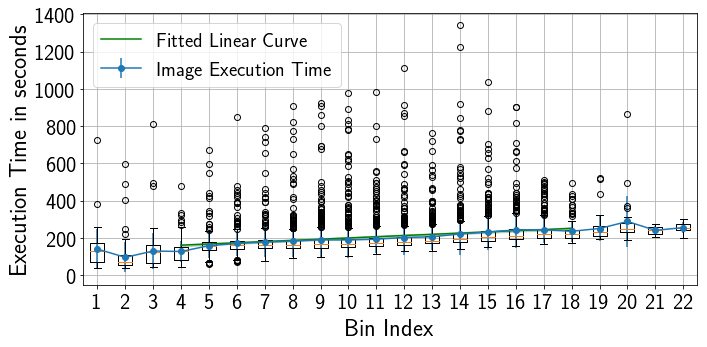

In [31]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(11,5),sharey='row')
x = train_stage_1_ranges['SizeMean'].values
_ = axis.boxplot(train_stage_1_ranges['TimeArray'].values)
_ = axis.errorbar(range(1,23),train_stage_1_ranges['TimeMean'].values,yerr=train_stage_1_ranges['TimeStd'].values,marker='o',label='Image Execution Time')
_ = axis.plot(range(4,19), y, 'g-', label="Fitted Linear Curve")
_ = axis.fill_between(range(4,19),y - s_test, y + s_test, color=greens(250), alpha=0.2)
_ = axis.set_ylabel('Execution Time in seconds',fontsize=24)
_ = axis.set_xlabel('Bin Index',fontsize=24)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=22)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=22)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
fig.savefig('stage_1_tx_box.pdf',dpi=800,bbox_inches='tight')